# <h1 align="center"><font color="gree">How to Visualize Machine Learning Models: From Linear Regression to Neural Networks</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

# <font color="red">Contextualizando</font>

`O aprendizado de máquina é complexo e frequentemente difícil de entender. Ao visualizar modelos de aprendizado de máquina, você pode obter um ótimo nível de entendimento do desempenho do modelo e das decisões que o modelo toma ao fazer previsões.`

Estudo baseado no tutorial de [Dario Radečić](https://www.datacamp.com/tutorial/visualize-machine-learning-models).

Os datasets são:

* [MBA Admission dataset, Class 2025](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset?resource=download)

* [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

O aprendizado de máquina é complexo e envolve muita matemática.

Como iniciante, você quase certamente terá dificuldades ao aprender o funcionamento interno de dezenas de modelos diferentes que você tem disponíveis. Esse problema aumenta para 11 se você não tem formação em `matemática`. Mas mesmo se você tiver um `PhD`, ainda achará difícil explicar os resultados do modelo para um empresário. Eles normalmente não compartilham seu nível de entusiasmo por detalhes técnicos, mas querem ter certeza de que seus modelos tomem decisões da maneira certa .

Então, como você pode preencher essa lacuna? 

Existe uma linguagem universal falada por profissionais de tecnologia e pessoas de negócios: `visualização de dados`. Os gráficos são fáceis de entender e tornam a explicação de tópicos complexos mais gerenciável, não importa sua formação.

Neste artigo, vou lhe ensinar os conceitos básicos e avançados de visualização de modelos de `machine learning supervisionados`. Se você está procurando bons materiais sobre `aprendizado não supervisionado`, nosso curso Unsupervised Learning with Python tem o que você precisa.

Após a leitura, os termos `coeffients` , `residuals` , `feature importance` , `SHAP` , `LIME` e `Grad-CAM` não parecerão uma língua estrangeira.

Vamos começar!

# <font color="red">Tipos de visualização mais comuns para modelos de aprendizado de máquina</font>

# <font color="yellow">Conjunto de dados e pré-processamento de dados</font>

## <font color="gree">`Conjunto de dados de classificação:` MBA Admission dataset, Class 2025</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_MBA = pd.read_csv("../SHAP_SHapley_Additive_exPlanations/data/MBA.csv")
df_MBA.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [3]:
df_MBA.shape

(6194, 10)

In [4]:
df_MBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [5]:
# Apenas um ID arbitrário:
df_MBA["admission"].value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

In [6]:
# Apenas um ID arbitrário:
df_MBA = df_MBA.drop(["application_id"], axis=1)
df_MBA.head(10)

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
5,Male,False,3.18,Business,White,610.0,6.0,Consulting,NaN
6,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
7,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,NaN
8,Male,False,3.24,Business,White,590.0,2.0,Nonprofit/Gov,NaN
9,Male,False,3.27,Humanities,Asian,690.0,3.0,Consulting,NaN


In [7]:
# Olhando os valores únicos da coluna "race":
df_MBA["race"].value_counts(dropna=False) # dropna=False para incluir os NaN


race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64

In [8]:
# Valores missing em "race":
df_MBA["race"].isnull().sum()  # ou df_MBA["race"].isna().sum()


np.int64(1842)

In [9]:
# Ver a porcentagem de valores missing em "race":
f"{((df_MBA["race"].isnull().sum() / len(df_MBA)) * 100).round(2)}%"

'29.74%'

In [10]:
# Preencher valores desconhecidos em "race" com "Unknown":
df_MBA["race"] = df_MBA["race"].fillna("Unknown")
df_MBA.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [11]:
# Analisando a coluna "admission":
df_MBA["admission"].value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

In [12]:
# Considerando na coluna "admission" os NaN como "Deny":
df_MBA["admission"] = df_MBA["admission"].fillna("Deny")

In [13]:
df_MBA.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


In [14]:
# Analisando a coluna "gender":
df_MBA["gender"].value_counts()


gender
Male      3943
Female    2251
Name: count, dtype: int64

In [15]:
df_MBA["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
# Converter colunas "gender" e "international" para 0/1:
df_MBA["gender"] = df_MBA["gender"].map({"Male": 0, "Female": 1})

df_MBA.head()



,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,0,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,1,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,0,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,0,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


In [17]:
df_MBA["international"] = df_MBA["international"].map({False: 0, True: 1})

df_MBA.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,0,0,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,1,1,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,0,0,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,0,0,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


In [18]:
# Analisando a coluna "major":
df_MBA["major"].value_counts(dropna=False)

major
Humanities    2481
STEM          1875
Business      1838
Name: count, dtype: int64

In [19]:
# Analisando a coluna "work_industry":
df_MBA["work_industry"].value_counts(dropna=False)


work_industry
Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Real Estate               111
Media/Entertainment        59
Retail                     33
Energy                     32
Name: count, dtype: int64

In [20]:
def load_classification_dataset() -> pd.DataFrame:
    # https://www.kaggle.com/datasets/taweilo/mba-admission-dataset?resource=download
    df = pd.read_csv("../SHAP_SHapley_Additive_exPlanations/data/MBA.csv")
    
    # Apenas um ID arbitrário:
    df = df.drop(["application_id"], axis=1)
    
    # Preencher valores desconhecidos:
    df["race"] = df["race"].fillna("Unknown")
    
    # Suponha que estes (os NaNs) sejam negados (denied):
    df["admission"] = df["admission"].fillna("Deny")
    
    # Converter as colunas "gender" e "international" para 0/1:
    df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
    df["international"] = df["international"].map({False: 0, True: 1})
    
    # Criamos colunas dummy para as colunas categóricas:
    cols_for_dummy = ["major", "race", "work_industry"]
    for col in cols_for_dummy:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
    
    # Para evitar a colinearidade, vamos dropar as colunas dummy:
    cols_to_drop = ["major", "race", "work_industry", "major_Humanities", "race_Unknown", "work_industry_Other"]
    df = df.drop(cols_to_drop, axis=1)
    return df


In [21]:
df_MBA_1 = load_classification_dataset()
df_MBA_1.head()

,gender,international,gpa,gmat,work_exp,admission,major_Business,major_STEM,race_Asian,race_Black,...,work_industry_Financial Services,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,3.30,620.0,3.0,Admit,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0,0,3.28,680.0,5.0,Deny,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,1,3.30,710.0,5.0,Admit,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3.47,690.0,6.0,Deny,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,0,3.35,590.0,5.0,Deny,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_MBA_1.shape

(6194, 26)

## <font color="gree">`Conjunto de dados de regressão:` Medical Cost Personal Datasets</font>

In [23]:
df_MedicalCostPersonal = pd.read_csv("../SHAP_SHapley_Additive_exPlanations/data/MedicalCostPersonal.csv")
df_MedicalCostPersonal.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df_MedicalCostPersonal.shape

(1338, 7)

In [25]:
df_MedicalCostPersonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
# Analisando a coluna "sex":
df_MedicalCostPersonal["sex"].value_counts(dropna=False)

sex
male      676
female    662
Name: count, dtype: int64

In [27]:
# Analisando a coluna "children":
df_MedicalCostPersonal["children"].value_counts(dropna=False)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [28]:
# Analisando a coluna "smoker":
df_MedicalCostPersonal["smoker"].value_counts(dropna=False)

smoker
no     1064
yes     274
Name: count, dtype: int64

In [29]:
# Analisando a coluna "region":
df_MedicalCostPersonal["region"].value_counts(dropna=False)


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [30]:
def load_regression_dataset() -> pd.DataFrame:
    # https://www.kaggle.com/datasets/mirichoi0218/insurance
    df = pd.read_csv("../SHAP_SHapley_Additive_exPlanations/data/MedicalCostPersonal.csv")
    
    # Escalar as características numéricas:
    cols_to_scale = ["age", "bmi", "children"]
    scaler = StandardScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    
    # Características binárias:
    df["sex"] = df["sex"].map({"male": 0, "female": 1})
    df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})
    
    # Dummies:
    dummies_region = pd.get_dummies(df["region"], prefix="region", drop_first=True)
    df = pd.concat([df, dummies_region], axis=1)
    df = df.drop("region", axis=1)
    return df



In [31]:
df_MedicalCostPersonal_1 = load_regression_dataset()
df_MedicalCostPersonal_1.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,1,-0.453320,-0.908614,1,16884.92400,False,False,True
1,-1.509965,0,0.509621,-0.078767,0,1725.55230,False,True,False
2,-0.797954,0,0.383307,1.580926,0,4449.46200,False,True,False
3,-0.441948,0,-1.305531,-0.908614,0,21984.47061,True,False,False
4,-0.513149,0,-0.292556,-0.908614,0,3866.85520,True,False,False


In [32]:
df_MedicalCostPersonal_1.shape

(1338, 9)

# <font color="yellow">Visualizar modelos baseados em árvore</font>

Modelos baseados em árvores são frequentemente usados ​​para classificação, mas a maioria deles também pode lidar com tarefas de regressão.

Nesta seção, mostrarei como visualizar uma `árvore de decisão`, a importância das features de um modelo de `random forest` e explicações de previsão com `SHAP` e `LIME`.

Tenha em mente que modelos de árvore de decisão e floresta aleatória podem ser difíceis de entender. O `datacamp` tem um curso completo que cobre os fundamentos de modelos de machine learning baseados em árvore em Python .

Para começar, carregue o conjunto de dados de classificação e divida-o em subconjuntos de treinamento e teste:

In [33]:
df = load_classification_dataset()

df.head()

,gender,international,gpa,gmat,work_exp,admission,major_Business,major_STEM,race_Asian,race_Black,...,work_industry_Financial Services,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,3.30,620.0,3.0,Admit,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0,0,3.28,680.0,5.0,Deny,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,1,3.30,710.0,5.0,Admit,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3.47,690.0,6.0,Deny,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,0,3.35,590.0,5.0,Deny,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Listando as colunas do dataframe:
for col in df.columns:
    print(col)


gender
international
gpa
gmat
work_exp
admission
major_Business
major_STEM
race_Asian
race_Black
race_Hispanic
race_Other
race_White
work_industry_CPG
work_industry_Consulting
work_industry_Energy
work_industry_Financial Services
work_industry_Health Care
work_industry_Investment Banking
work_industry_Investment Management
work_industry_Media/Entertainment
work_industry_Nonprofit/Gov
work_industry_PE/VC
work_industry_Real Estate
work_industry_Retail
work_industry_Technology


In [36]:
X = df.drop("admission", axis=1)
y = df["admission"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<font color="orange">A seguir, vamos visualizar uma árvore de decisão!</font>

## <font color="blue">Árvores de decisão</font>

Pense em uma árvore de decisão como um conjunto de instruções aninhadas `if` nas quais as condições são determinadas por um modelo de aprendizado de máquina. 

Há mais na história, mas com essa analogia, você pode ver que visualizar decisões deve ser um processo direto. E é: a função `plot_tree()` from sklearn lida com a maior parte do trabalho pesado.

Comece treinando um modelo de árvore de decisão. O parâmetro `max_depth` é opcional e está aqui apenas para fins de visualização. Sem ele, a árvore ficará muito profunda e você se perderá no grande volume de decisões que o modelo toma, especialmente para conjuntos de dados maiores.

O `snippet` a seguir treina o modelo de `classificação de árvore de decisão` no subconjunto de treinamento:


In [37]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

<font color="orange">E para visualização, basta copiar o seguinte `snippet`. Os parâmetros opcionais `filled` e `feature_names` tornam a árvore mais fácil de interpretar:</font>


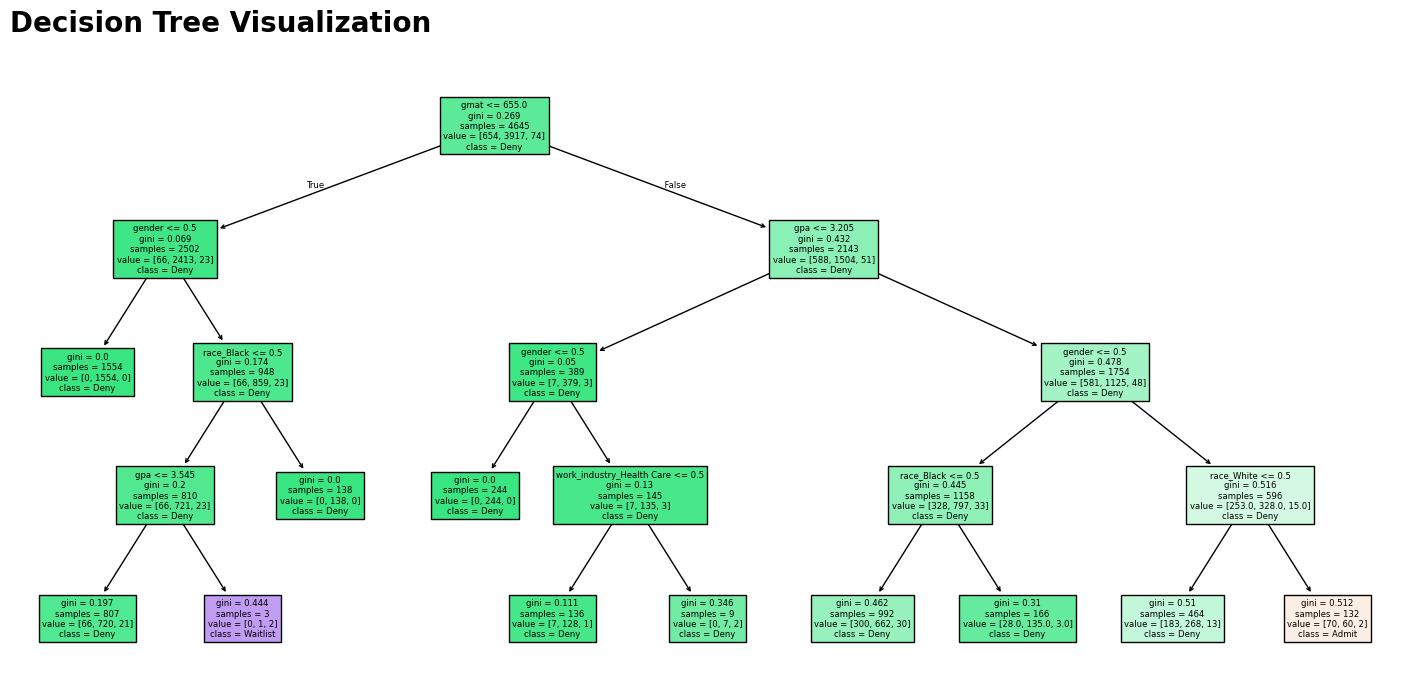

In [42]:
plt.figure(figsize=(18,8))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree Visualization", size=20, loc="left", y=1.04, weight="bold")
plt.show()